# Assignment 4: Unsupervised Learning
### ip222gs

## Exercise 3: Visualization of Results

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances
from sammon_own import sammon # import function from Ex. 2
from bkmeans_own import bkmeans # import funciton form Ex. 1
from sklearn.cluster import KMeans, AgglomerativeClustering

Following datasets have been chosen in this exercise


https://www.openml.org/d/1489 <br>
Phoneme <br>
The aim of this dataset is to distinguish between nasal (class 0) and oral sounds (class 1). <br>
6 features (including target variable) and 5404 instances. <br>

https://www.openml.org/d/40984 <br>
Image Segmentation Data Set <br>
The instances were drawn randomly from a database of 7 outdoor images. The images were hand-segmented to create a classification for every pixel. Each instance is a 3x3 region. <br>
20 features (including target variable) and 2310 instances. <br>

https://www.openml.org/d/54 <br>
Vehicle Silhouettes <br>
Classify a given silhouette as one of four types of vehicles, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. <br>
19 features (including target variable) and 846 instances. <br>



In [3]:
# Start by reading csv using pandas
df_phoneme = pd.read_csv('phoneme.csv')
df_image = pd.read_csv('segment.csv')
df_vehicle = pd.read_csv('vehicle.csv')

In [4]:
# Convert target variable for df_image and df_vehicle using label encoder
le = LabelEncoder() 
df_image['class'] = le.fit_transform(df_image['class'])
df_vehicle['Class'] = le.fit_transform(df_vehicle['Class'])

In [5]:
# Convet pandas dataframes to numpy arrays
df_phoneme = df_phoneme.to_numpy()
df_image = df_image.to_numpy()
df_vehicle = df_vehicle.to_numpy()


In [6]:
# Shuffle values
np.random.shuffle(df_phoneme)
np.random.shuffle(df_image)
np.random.shuffle(df_vehicle)

In [7]:
# Split features and target arrays for all 3 datasets
X_phoneme = df_phoneme[:, :-1]
y_phoneme = df_phoneme[:, -1].reshape(-1,1)

X_image = df_image[:, :-1]
y_image = df_image[:, -1].reshape(-1,1)

X_vehicle = df_vehicle[:, :-1]
y_vehicle = df_vehicle[:, -1].reshape(-1,1)

In [8]:
# Transform features by scailing in range [0, 1]
scaler = MinMaxScaler()
X_phoneme = scaler.fit_transform(X_phoneme)
X_image = scaler.fit_transform(X_image)
X_vehicle = scaler.fit_transform(X_vehicle)

## Task 3.1. Comparison of DR Techniques

In [27]:
# Implement sammon algorithm to all three datasets, reduce to 200 instances due to computational time
# Using function from the 2nd Exercise

X_phoneme_sammon = sammon(X_phoneme[:200], 100, 0.1, 0.2)
X_image_sammon = sammon(X_image[:200], 100, 0.1, 0.2)
X_vehicle_sammon = sammon(X_vehicle[:200], 100, 0.1, 0.2)

0.09957761769306114
0.09959931455952595
0.09534970687490928


In [28]:
# Implement PCA algorithm to all three datasets

pca = PCA(n_components=2) # 2 principal components to be used for ease of visualition

X_phoneme_pca = pca.fit_transform(X_phoneme[:1000])
X_image_pca = pca.fit_transform(X_image[:1000])
X_vehicle_pca = pca.fit_transform(X_vehicle)

In [29]:
# Implement T-SNE algorithm to all three datasets

tsne = TSNE(n_components=2) # 2 dimensions to be used for ease of visualition

X_phoneme_tsne = tsne.fit_transform(X_phoneme[:1000])
X_image_tsne = tsne.fit_transform(X_image[:1000])
X_vehicle_tsne = tsne.fit_transform(X_vehicle)

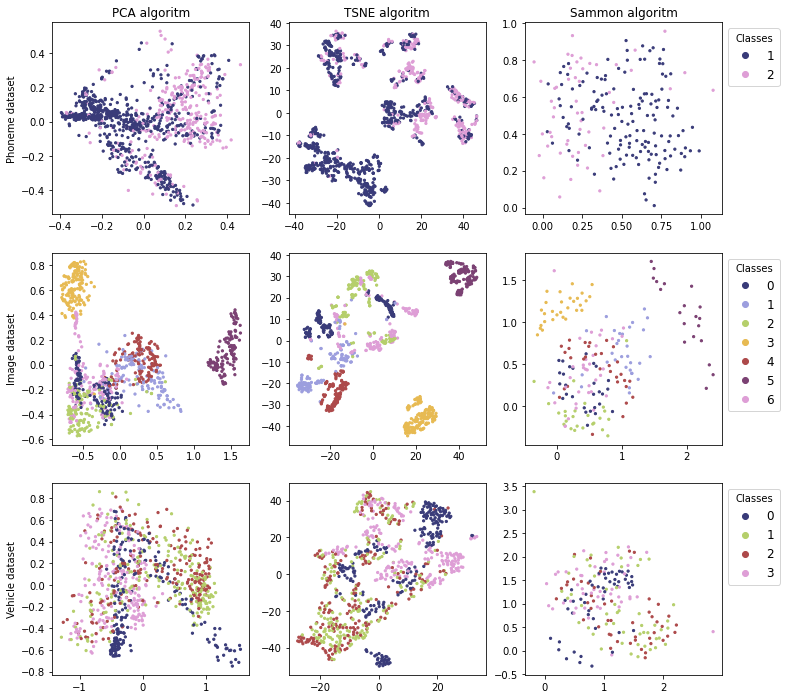

In [89]:
# Scatterplot

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))


axs[0,0].scatter(X_phoneme_pca[:, 0], X_phoneme_pca[:, 1], c=y_phoneme[:1000], cmap='tab20b', s=5)
axs[0,0].set(title = 'PCA algoritm')
axs[0,0].set(ylabel = 'Phoneme dataset')
axs[0,1].scatter(X_phoneme_tsne[:, 0], X_phoneme_tsne[:, 1], c=y_phoneme[:1000], cmap='tab20b', s=5)
axs[0,1].set(title = 'TSNE algoritm')
scatter_1 = axs[0,2].scatter(X_phoneme_sammon[:, 0], X_phoneme_sammon[:, 1], cmap='tab20b',  c=y_phoneme[:200], s=5)
axs[0,2].set(title = 'Sammon algoritm')
axs[1,0].scatter(X_image_pca[:, 0], X_image_pca[:, 1], c=y_image[:1000], cmap='tab20b', s=5)
axs[1,0].set(ylabel = 'Image dataset')
axs[1,1].scatter(X_image_tsne[:, 0], X_image_tsne[:, 1], c=y_image[:1000], cmap='tab20b', s=5)
scatter_2 = axs[1,2].scatter(X_image_sammon[:, 0], X_image_sammon[:, 1], c=y_image[:200], cmap='tab20b', s=5)
axs[2,0].scatter(X_vehicle_pca[:, 0], X_vehicle_pca[:, 1], c=y_vehicle, cmap='tab20b',  s=5)
axs[2,0].set(ylabel = 'Vehicle dataset')
axs[2,1].scatter(X_vehicle_tsne[:, 0], X_vehicle_tsne[:, 1], c=y_vehicle, cmap='tab20b',  s=5)
scatter_3 = axs[2,2].scatter(X_vehicle_sammon[:, 0], X_vehicle_sammon[:, 1], c=y_vehicle[:200], cmap='tab20b', s=5)

legend_1 = axs[0,2].legend(*scatter_1.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))
legend_2 = axs[1,2].legend(*scatter_2.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))
legend_3 = axs[2,2].legend(*scatter_3.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))

Sammon DR provides best results for the Phonemene dataset with 2 classes, but struggles then number of classes is larger than 2, most probably algorithm requires additional tuning. <br>
Based on current results PCA and T-SNE algorithms provide better distinguishing between classes then number of classes is larger than 2, even though they both struggling with proper class distinguishing on more complex dataset like Image dataset and Vehicle dataset. <br>
Specifically in Image dataset one can observe that there are certain classes which are clearly separated from the rest like class 3 and 5. Classes were correctly separated by all algorithms.



## Task 3.2. Comparison of Clustering Techniques

Will use T-SNE DR technique to use the 2d-dimensioanal set


In [102]:
# Implement Bisecting k-Means using function from the 1st Exercise

y_phoneme_Bkmeans = bkmeans(X_phoneme_tsne, 2, 100)
y_image_Bkmeans = bkmeans(X_image_tsne, 7, 100)
y_vehicle_Bkmeans = bkmeans(X_vehicle_tsne, 4, 100)

In [117]:
# Implement k-Means from Sklearn package

y_phoneme_kmeans = KMeans(n_clusters=2, random_state=0).fit_predict(X_phoneme_tsne)
y_image_kmeans = KMeans(n_clusters=7, random_state=0).fit_predict(X_image_tsne)
y_vehicle_kmeans = KMeans(n_clusters=4, random_state=0).fit_predict(X_vehicle_tsne)

In [118]:
# Implement Hierarchical clustering using AgglomerativeClustering from Sklearn package

y_phoneme_aggl = AgglomerativeClustering(n_clusters=2).fit_predict(X_phoneme_tsne)
y_image_aggl = AgglomerativeClustering(n_clusters=7).fit_predict(X_image_tsne)
y_vehicle_aggle = AgglomerativeClustering(n_clusters=4).fit_predict(X_vehicle_tsne)

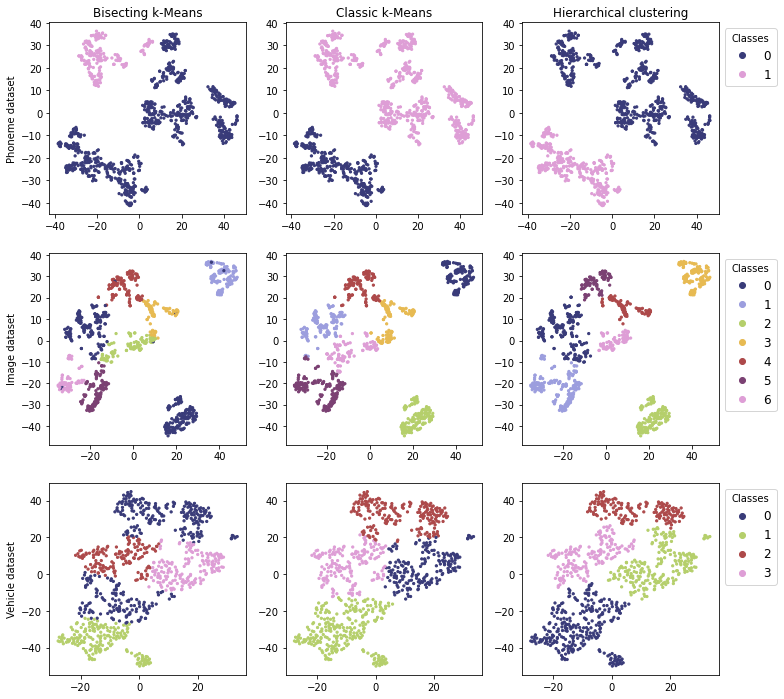

In [119]:
# Scatterplot

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(12,12))


axs[0,0].scatter(X_phoneme_tsne[:, 0], X_phoneme_tsne[:, 1], c=y_phoneme_Bkmeans, cmap='tab20b', s=5)
axs[0,0].set(title = 'Bisecting k-Means')
axs[0,0].set(ylabel = 'Phoneme dataset')
axs[0,1].scatter(X_phoneme_tsne[:, 0], X_phoneme_tsne[:, 1], c=y_phoneme_kmeans, cmap='tab20b', s=5)
axs[0,1].set(title = 'Classic k-Means')
scatter_1 = axs[0,2].scatter(X_phoneme_tsne[:, 0], X_phoneme_tsne[:, 1], cmap='tab20b',  c=y_phoneme_aggl, s=5)
axs[0,2].set(title = 'Hierarchical clustering')
axs[1,0].scatter(X_image_tsne[:, 0], X_image_tsne[:, 1], c=y_image_Bkmeans, cmap='tab20b', s=5)
axs[1,0].set(ylabel = 'Image dataset')
axs[1,1].scatter(X_image_tsne[:, 0], X_image_tsne[:, 1], c=y_image_kmeans, cmap='tab20b', s=5)
scatter_2 = axs[1,2].scatter(X_image_tsne[:, 0], X_image_tsne[:, 1], c=y_image_aggl, cmap='tab20b', s=5)
axs[2,0].scatter(X_vehicle_tsne[:, 0], X_vehicle_tsne[:, 1], c=y_vehicle_Bkmeans, cmap='tab20b',  s=5)
axs[2,0].set(ylabel = 'Vehicle dataset')
axs[2,1].scatter(X_vehicle_tsne[:, 0], X_vehicle_tsne[:, 1], c=y_vehicle_kmeans, cmap='tab20b',  s=5)
scatter_3 = axs[2,2].scatter(X_vehicle_tsne[:, 0], X_vehicle_tsne[:, 1], c=y_vehicle_aggle, cmap='tab20b', s=5)

legend_1 = axs[0,2].legend(*scatter_1.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))
legend_2 = axs[1,2].legend(*scatter_2.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))
legend_3 = axs[2,2].legend(*scatter_3.legend_elements(), loc='upper left', title='Classes', fontsize='large', bbox_to_anchor=(1, 1))

All Clustering techniques show good results by performing clustering on provided datasets, both for bi-class and multi-class datasets. <br>
Classic k-Means and Hierarchical clustering method provide good and similar results for all 3 datasets. Bisecting k-Means however is not able to clearly separate classes in Phoneme and Vehicle datasets. <br> It is important to mention that Bisecting Kmeans method is based on largest quantity cluster method, not largest SSE method, which can explain the non-optimal method prediction behaviour for some classes in Phoneme and Vehicle datasets. <br> It is difficult to point out the clear winner between K-means and Hierarchical clustering methods as both methods provide similar results. <br> In general, I would assume to see the better datasets clustering using Hierarchical clustering method due to complex nature of data, as Kmeans is expected to work better with spherical structure of data.

